In [ ]:
import pandas as pd
import json
import os

In [ ]:
from tasks.download import download_data
download_data(fresh_start=False)

In [ ]:
from tasks.preprocess import preprocess_MANUAL_files
preprocess_MANUAL_files()

In [ ]:
from tasks.preprocess import preprocess_API_files
preprocess_API_files()

In [ ]:
from tasks.compute_indicators import compute_indicators
compute_indicators()

In [ ]:
from tasks.process import process_indicators
process_indicators()

In [ ]:
from tasks.compute_index import compute_index 
compute_index(save=True)

In [37]:
import pandas as pd
test = pd.read_csv('data/full_data/result.csv')

In [ ]:
from tasks.post_process import make_timeseries_excel, make_imputation_report, make_data_report

make_timeseries_excel()
make_imputation_report()
make_data_report()

In [ ]:
test.query("Variable == 'Index' and Year == 2020").sort_values(by='Value').tail(20)

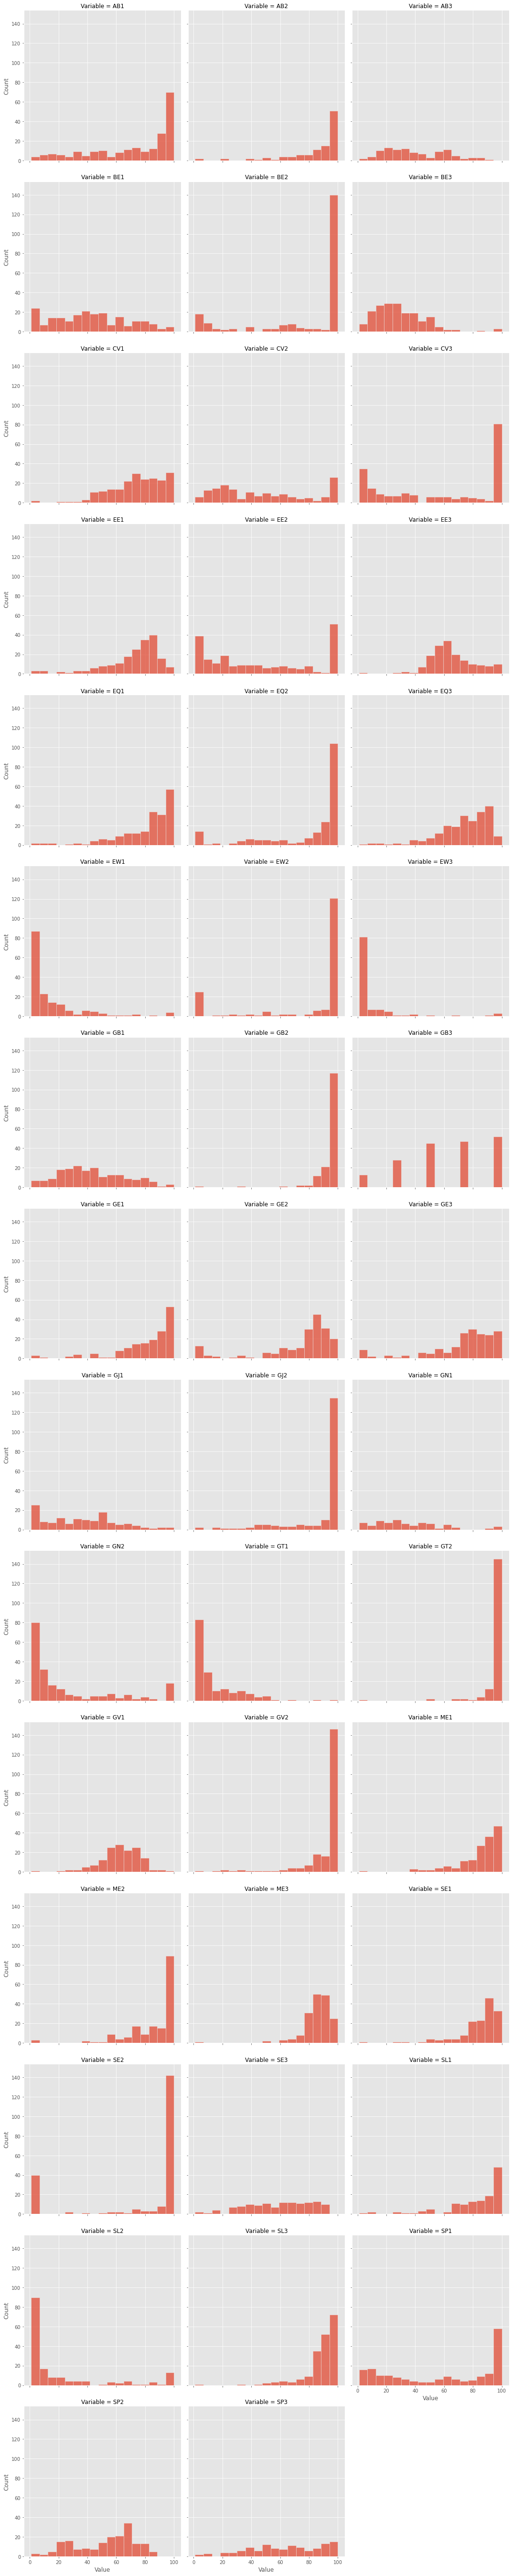

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plot_df = test.query("Aggregation in ['Indicator_normed'] and Year == 2020").sort_values(by='Variable').dropna()
sns.displot(data=plot_df, x="Value", col="Variable", kind="hist", col_wrap=3)

In [ ]:
plot_df = test.query("Aggregation in ['Dimension'] and Year == 2020").sort_values(by='Variable').dropna()
sns.displot(data=plot_df, x="Value", col="Variable", kind="hist", col_wrap=3)

In [ ]:
test.query("Aggregation == 'Indicator_normed' and Variable == 'ME3' and Year == 2018").dropna().sort_values(by='Value').tail(20)

In [ ]:
test.query("ISO == 'SWE' and Aggregation == 'Indicator_normed' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
test.query("ISO == 'DEU' and Aggregation == 'Indicator_normed' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
pd.read_csv('data/indicator/EW3/processed/EW3_SDG.csv').query('Year == 2020').sort_values(by='Value').head(10)


In [ ]:
test.query("ISO == 'FRA' and Aggregation == 'Category' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
pd.read_csv('data/indicator/GN2/processed/GN2_SDG.csv').query('Year == 2018').Description.unique()

In [ ]:
test.query("ISO == 'SWE' and Aggregation == 'Indicator_normed' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
pd.read_csv('data/indicator/GV2/processed/GV2_SDG.csv').query('Year == 2020').sort_values(by='Value')

In [ ]:
test.query("Aggregation == 'Indicator_normed'").query('Year == 2019 and Variable == "EW3"').dropna(subset=['Value']).sort_values(by='Value').tail(30)#.dropna(subset=['Value'])#.Variable.uniqueGJ

In [ ]:
test.query("ISO == 'SWE' and Aggregation == 'Dimension' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
test.query("ISO == 'FRA' and Aggregation == 'Category' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
test.query("ISO == 'SWE' and Aggregation == 'Indicator_normed' and Year == 2020")#.query('Year == 2019 and Variable == "EW3"')

In [ ]:
pd.read_csv('data/indicator/GN2/preprocessed//GN2_SDG.csv')

In [ ]:
pd.read_csv('data/indicator/GJ2/preprocessed/GJ2_SDG.csv').ISO.unique()#.query('ISO == "SWE"')#.URL.unique()#.ISO.unique()#.query('ISO == "DEU"')

In [ ]:
import pandas as pd
pd.read_csv('data/full_data/result.csv')

AB1


/home/simon/Work/Anticipe/tasks/post_process.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_formatted['Year'] = df_formatted['Year'].astype(int)


AB2
AB3
BE1
BE2
BE3
CV1
CV2
CV3
EE1
EE2
EE3
EQ1
EQ2
EQ3
EW1
EW2
EW3
GB1
GB2
GB3
GE1
GE2
GE3
GJ1
GJ2
GN1
GN2
GT1
GT2
GV1
GV2
ME1
ME2
ME3
SE1
SE2
SE3
SL1
SL2
SL3
SP1
SP2
SP3
AB
BE
CV
EE
EQ
EW
GB
GE
GJ
GN
GT
GV
ME
SE
SL
SP
SI
NCP
ESRU
GEO
Index


In [35]:
pd.read_csv('data/indicator/EW2/processed/EW2_SDG.csv').query('Year == 2020 and ISO == "COD"')

,ISO,Year,Description,Source,URL,DownloadDate,Indicator,From,Imputed,Value,Corrected,Country
728,COD,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,0.23,False,DR Congo


In [32]:
pd.read_csv('data/indicator/EW2/processed/EW2_SDG.csv').query('Year == 2020').sort_values(by='Value').tail(20)

,ISO,Year,Description,Source,URL,DownloadDate,Indicator,From,Imputed,Value,Corrected,Country
500,BRB,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,87.50,False,Barbados
2041,LKA,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,90.79,False,Sri Lanka
1694,ISR,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,95.94,False,Israel
3449,TUN,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,96.00,False,Tunisia
1757,JOR,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,100.08,False,Jordan
2629,OMN,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,116.71,False,Oman
1064,EGY,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,116.94,False,Egypt
2650,PAK,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,118.24,False,Pakistan
2996,SDN,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,118.66,False,Sudan
3283,SYR,2020,Level of water stress: freshwater withdrawal a...,Food and Agriculture Organisation of United Na...,https://unstats.un.org/SDGAPI/v1/sdg/Series/Da...,NaN,EW2,SDG API,True,124.36,False,Syria


In [13]:
import pandas as pd
result = pd.read_csv('data/full_data/result.csv')
result_2019 = pd.read_csv('data/2019_archive/result.csv')

In [26]:
result_2019['Rank'] = result_2019.groupby(['Aggregation', 'Variable', 'Year']).Value.rank(ascending=False)
result['Rank'] = result.groupby(['Aggregation', 'Variable', 'Year']).Value.rank(ascending=False)

In [27]:
test =  result.merge(result_2019, on=['ISO', 'Variable', 'Aggregation', 'Year', 'Country'], suffixes=('_new', '_old'))

In [28]:
import plotly.express as px
px.scatter(test.query("Variable == 'Index' and Year == 2019"), x='Rank_old', y='Rank_new', hover_data=['Country', 'ISO'])